# Report 5

In [325]:
#Fetching Modules to be used for scheme
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

Importing the file that contains only 'skype' connections. The file has been filtered before using grep commands and has been saved separately.

In [326]:
file=pd.read_csv('skype.txt',sep=' ') 

display(file)

,#15#c_ip:1,c_port:2,c_pkts_all:3,c_rst_cnt:4,c_ack_cnt:5,c_ack_cnt_p:6,c_bytes_uniq:7,c_pkts_data:8,c_bytes_all:9,c_pkts_retx:10,...,s_last_handshakeT:122,c_appdataT:123,s_appdataT:124,c_appdataB:125,s_appdataB:126,fqdn:127,dns_rslv:128,req_tm:129,res_tm:130,http_hostname:131
0,67.32.101.168,57036,21,0,20,12,1809,7,1809,0,...,92.338,93.008,92.338,329,6411,edge.skype.com,130.192.3.24,1.513070e+12,1.513070e+12,-
1,67.32.101.168,57035,23,0,22,15,1482,6,1482,0,...,644.082,432.974,644.082,333,5485,contacts.skype.com,130.192.3.21,1.513070e+12,1.513070e+12,-
2,67.32.181.212,59433,21,0,20,13,1261,6,1261,0,...,22.050,20.212,22.050,644,9130,-,-,0.000000e+00,0.000000e+00,-
3,67.32.181.213,49132,46,0,45,26,11501,18,11501,0,...,138.846,145.193,185.780,407,3868,-,-,0.000000e+00,0.000000e+00,-
4,67.32.230.22,58596,8,0,7,2,629,5,629,0,...,0.000,0.000,0.000,0,0,103.0.40.7.0.rst10.r.skype.net,130.192.3.21,1.513070e+12,-1.000000e+03,-
5,67.32.230.22,58579,26,0,25,8,11429,17,11429,0,...,127.145,138.823,175.079,399,3868,s.gateway.messenger.live.com,130.192.3.21,1.513070e+12,-1.000000e+03,-
6,67.32.172.172,49994,25,0,24,17,1850,6,2751,1,...,675.874,675.936,841.129,412,6066,static.asm.skype.com,130.192.3.24,1.513070e+12,-1.000000e+03,-
7,67.32.66.225,64912,16,0,15,6,6464,8,6464,0,...,143.105,145.501,39774.142,402,5596,client-s.gateway.messenger.live.com,130.192.3.24,1.513070e+12,1.513070e+12,-
8,67.32.230.5,52062,8,0,7,4,817,3,817,0,...,103.410,115.637,153.343,294,6402,config.edge.skype.com,130.192.3.21,1.513070e+12,-1.000000e+03,-
9,67.32.87.168,55454,15,0,14,8,1757,5,1757,0,...,148.115,149.462,191.059,431,4118,c.msn.com,130.192.3.21,1.513070e+12,-1.000000e+03,-


First of all, we will create a new column in the DataFrame "file" where will be found the subservice name for each row. We know that subservice name can be found in 4 different columns: 

colunm 116 - c_tls_SNI - Server Name Indication (SNI)
column 117 - s_tls_SCN - Subject Common Name (SCN)
column 127 - The Fully Qualified Domain Name (fqdn)
column 131 - http_hostname.

In order to apply the filtering commands that are required in the following questions, we will need the subservices to be found in only 1 column.


In [190]:
names_subservices = file[['fqdn:127', 'c_tls_SNI:116', 's_tls_SCN:117', 'http_hostname:131']]
names_subservices

,fqdn:127,c_tls_SNI:116,s_tls_SCN:117,http_hostname:131
0,edge.skype.com,edge.skype.com,edge.skype.com,-
1,contacts.skype.com,contacts.skype.com,*.contacts.skype.com,-
2,-,static-asm.secure.skypeassets.com,*.vo.msecnd.net,-
3,-,db5-s.gateway.messenger.live.com,msg.skype.com,-
4,103.0.40.7.0.rst10.r.skype.net,-,-,-
5,s.gateway.messenger.live.com,s.gateway.messenger.live.com,msg.skype.com,-
6,static.asm.skype.com,static.asm.skype.com,static.asm.skype.com,-
7,client-s.gateway.messenger.live.com,client-s.gateway.messenger.live.com,apis.skype.com,-
8,config.edge.skype.com,config.edge.skype.com,edge.skype.com,-
9,c.msn.com,c1.skype.com,c.msn.com,-


In the plot above we can notice that for each row there might be at least one subservice name on 1 of those columns. Empty columns are represented by a "-" sign. 

We will search per each row, on all 4th columns in a fixed order based on priority of columns and will "combine_first" command in order to copy the content on new column. It basically fills null values in one DataFrame with non-null values from other DataFrame, but the command does not work if the content is a sign. 
For this reason we will create a new DataFrame where all "-" signs will be replaced By NaN.

In [191]:
file_log=file.replace("-",np.nan);
file_log['skype_subservices'] = file_log['http_hostname:131'].combine_first( \
                                            file_log['fqdn:127'].combine_first( \
                                                file_log['c_tls_SNI:116'].combine_first( \
                                                    file_log['s_tls_SCN:117'])));

file_log[['skype_subservices']].iloc[1:10]

,skype_subservices
1,contacts.skype.com
2,static-asm.secure.skypeassets.com
3,db5-s.gateway.messenger.live.com
4,103.0.40.7.0.rst10.r.skype.net
5,s.gateway.messenger.live.com
6,static.asm.skype.com
7,client-s.gateway.messenger.live.com
8,config.edge.skype.com
9,c.msn.com


In this way it will be easy for us to get more information for specific subservices.

#### Count the fraction of different “connection type”.

Connection type is defined by the protocol being used for transmission. Protocol type is found in column 42 of Tstat file. First of all, we create a new DataFrame where we copy only the column from Tstat that contains Protocol Type ["con_t:42"]. 

In [192]:
connection_type = file_log[["con_t:42"]]
connection_type.columns=["Protocols"];
connection_type[["Protocols"]].iloc[1:10]


,Protocols
1,8192
2,8192
3,8192
4,0
5,8192
6,8192
7,8192
8,8192
9,8192


Furthermore, we add another column to the last DataFrame that contains only the value '1'. Then, we apply the command groupby and count and we will get as a result a table that contains Protocol number and the total number that has been found in the file_log. 

By having one specific dataframe with only 2 columns that contain the information we need, it is easy to plot the histogram in an increasing order.

In [193]:
connection_type["Count"] = '1'
connection_type1 = connection_type.groupby("Protocols")[["Count"]].count().sort_values(by = "Count", ascending=False)
connection_type1

/home/laboratorio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Count
Protocols,
8192,25663
0,842
1,35
131072,21
16384,6
24576,5


It is noticeable that most of the connections are HTTPS flows (type=8192), which means application data transferred.

Text(0.5,1,'Connection_Type')

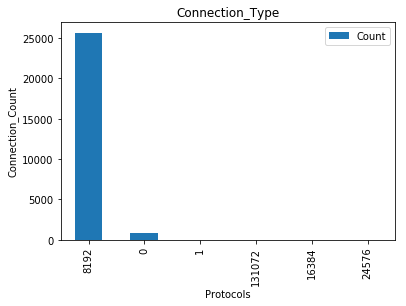

In [194]:
axes = connection_type1.plot.bar()
axes.set_ylabel("Connection_Count");
axes.set_title("Connection_Type")

### Subservices 

Subservices used by skype are all listed in the Skype_Subservices column of file_log. We follow the same procedure like in the previous case, by creating a new DataFrame with 2 columns.
Subservices are listed all in the first column and the second one contains the total number.

In [195]:
services = file_log[["skype_subservices"]]
services.columns=["Subservices"];
services["Number_subservices"]='1'
services1 = services.groupby("Subservices")[["Number_subservices"]].count().sort_values(by = "Number_subservices", ascending=False)
services1.iloc[1:10]


/home/laboratorio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Number_subservices
Subservices,
client-s.gateway.messenger.live.com,2917
static-asm.secure.skypeassets.com,2005
static.asm.skype.com,1949
apps.skype.com,1259
edge.skype.com,984
a.config.skype.com,921
b.config.skype.com,753
pipe.skype.com,606
contacts.skype.com,545


Text(0.5,1,'Skype_Subservices')

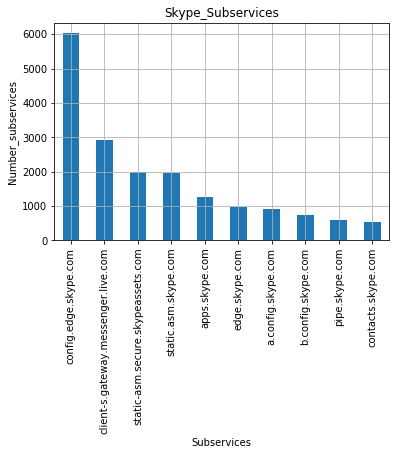

In [196]:
axes = services1.head(10).plot.bar(grid=True, legend=False)
axes.set_ylabel("Number_subservices");
axes.set_title("Skype_Subservices")


Above it is shown the plot for 10 mostly used subservices. A quick search on Skype website and we found that the first domains that allow users to start a connections and to route the call from the internal network. 

### The IP addresses used by servers.

Server IP address can be found in the column 's_ip:15' of Tstat file. 
We will first create a new DataFrame whith 2 columns, Server IP addresses and Number of IP Addresses per Server. 

In [360]:
servers = file_log[["s_ip:15"]]
servers.columns = ["Server_IP"];
servers["Number_connections"]='1';
servers1 = servers.groupby("Server_IP")[["Number_connections"]].count().sort_values(by = "Number_connections", ascending=False);
servers1.iloc[1:20]



/home/laboratorio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Number_connections
Server_IP,
40.77.226.194,3366
68.232.34.200,2548
2.17.204.50,1287
52.175.17.224,1096
40.127.129.109,710
191.234.20.241,709
13.76.170.95,628
40.77.226.192,454
13.75.105.64,426


Here we have a plot of 10 most contacted server IP addresses.

Text(0.5,1,'Server_IP_Addresses')

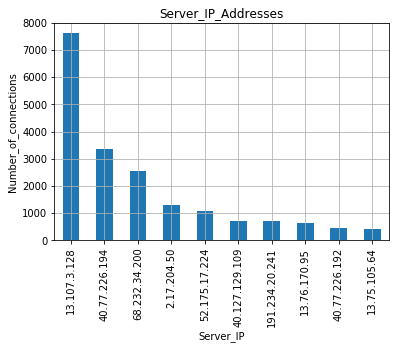

In [198]:
axes = servers1.head(10).plot.bar(grid=True, legend=False)
axes.set_ylabel("Number_of_connections");
axes.set_title("Server_IP_Addresses")

### Sub-services mapped to IP servers.

In [358]:
IP_Mapping = file_log.groupby(["s_ip:15","skype_subservices"])["skype_subservices"].count().sort_values(ascending=False)
IP_Mapping.iloc[1:10]

s_ip:15         skype_subservices                  
40.77.226.194   client-s.gateway.messenger.live.com    2793
68.232.34.200   static-asm.secure.skypeassets.com      1966
2.17.204.50     apps.skype.com                         1239
52.175.17.224   static.asm.skype.com                    855
13.107.3.128    edge.skype.com                          777
191.234.20.241  a.config.skype.com                      663
13.107.3.128    b.config.skype.com                      644
13.76.170.95    static.asm.skype.com                    494
40.127.129.109  pipe.skype.com                          415
Name: skype_subservices, dtype: int64

Text(0.5,1,'Subservices_mapped_to_Servers_IP_Addresses')

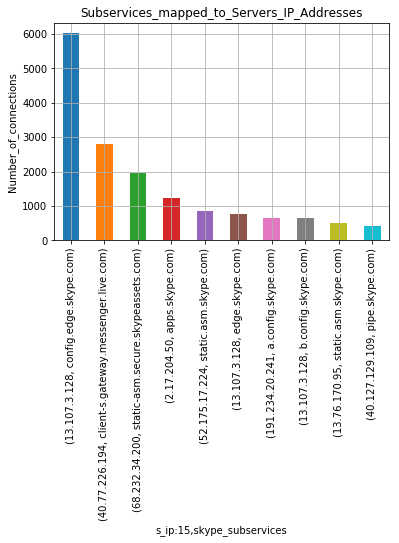

In [200]:
axes = IP_Mapping.head(10).plot.bar(grid=True, legend=False)
axes.set_ylabel("Number_of_connections");
axes.set_title("Subservices_mapped_to_Servers_IP_Addresses")

After mapping Server IP Address to Subservices, again we notice that most contacted IP addresses correspond to most contacted service domain. It is somehow expected, because connection requests to a domain will be followed by a connection request to the corresponding server that provides that service.

Furthermore, we notice that subservice: static.asm.skype.com is using 2 IP addresses. It is expected that Skype is providing service through different servers for a lot of reasons: redundancy, load balancing.

### Flows per subservice

Flows are filtered based on clients port found in column 'c_port:2' of Tstat.
We know that each flow is characterized by source port and destination port that are unique. So this information may be used in order to count different flows opened per each subservice.

In [201]:
Flows_subservice = file_log.groupby("skype_subservices")[["c_port:2"]].count().sort_values(by = "c_port:2", ascending = False)
Flows_subservice

,c_port:2
skype_subservices,
config.edge.skype.com,6024
client-s.gateway.messenger.live.com,2917
static-asm.secure.skypeassets.com,2005
static.asm.skype.com,1949
apps.skype.com,1259
edge.skype.com,984
a.config.skype.com,921
b.config.skype.com,753
pipe.skype.com,606


Text(0.5,1,'Number_of_flows_per_subservice')

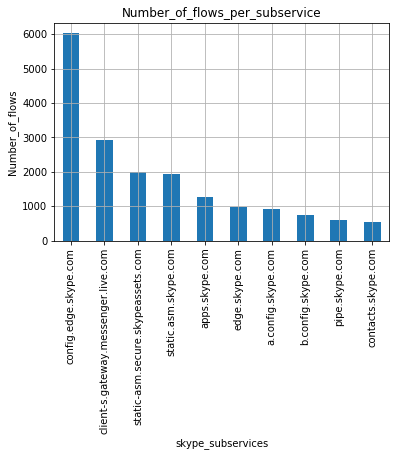

In [202]:
axes = Flows_subservice.head(10).plot.bar(grid=True, legend=False)
axes.set_ylabel("Number_of_flows");
axes.set_title("Number_of_flows_per_subservice")

### How many customers access the service

In order to count total number of clients which accessed the service, we should count unique Client IP addresses from column: '#15#c_ip:1':

In [203]:
file_log['#15#c_ip:1'].nunique()

873

Count the client IP addresses handled by each IP addresses matching the service.


In [218]:
Server_Client=file_log.groupby(["s_ip:15"])["#15#c_ip:1"].count().sort_values(ascending=False)
Server_Client.iloc[1:10]

s_ip:15
40.77.226.194     3366
68.232.34.200     2548
2.17.204.50       1287
52.175.17.224     1096
40.127.129.109     710
191.234.20.241     709
13.76.170.95       628
40.77.226.192      454
13.75.105.64       426
Name: #15#c_ip:1, dtype: int64

Text(0.5,1,'Number_of_client_IP_addresses_per_Server')

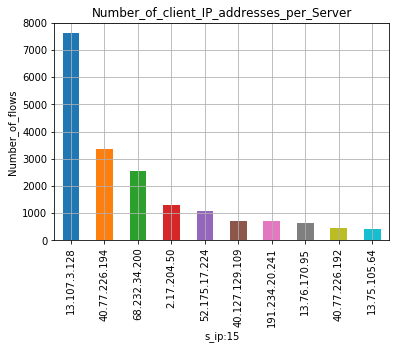

In [220]:
axes = Server_Client.head(10).plot.bar(grid=True, legend=False)
axes.set_ylabel("Number_of_flows");
axes.set_title("Number_of_client_IP_addresses_per_Server")

 ### Bytes handled by each IP addresses matching the service.

We need to count the total bytes handled by each IP addresses matching the service. There is one column on Tstat file that gives the amount of bytes transfered from Server to client per each connection and another one that provides amount of bytes from client towards the server. Both columns are : "c_bytes_all:9", "s_bytes_all:23".

As we need to count total amount of bytes handled by each IP address, means bytes that are transferred from C=>S and from S=>C. First we create a new dataframe by applying groupby(Server_IP), in order to count total bytes transfered by each IP address.


In [244]:
Servers_matching_Services = file_log.groupby("s_ip:15")
client_bytes = Servers_matching_Services["c_bytes_all:9"].sum()
server_bytes = Servers_matching_Services["s_bytes_all:23"].sum()

Total_Bytes = client_bytes + server_bytes

Total_Bytes_sorted=Total_Bytes.sort_values(ascending=False)
Total_Bytes_sorted.iloc[1:10]

s_ip:15
68.232.34.200     190432131
13.95.234.10      153450730
40.77.226.194      87717574
13.107.3.128       75558681
93.184.221.200     48880277
40.77.226.192      28356474
191.234.20.241     11450661
40.127.129.109     11329899
67.32.116.102      11127774
dtype: int64

The following plot is showing top 10 servers that have exchanged more data.

Text(0.5,1,'Total_Bytes_handled_by_Server_IP')

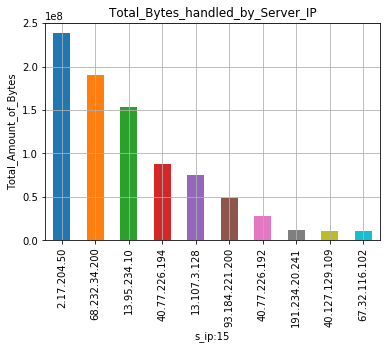

In [245]:
axes = Total_Bytes_sorted.head(10).plot.bar(grid=True, legend=False)
axes.set_ylabel("Total_Amount_of_Bytes");
axes.set_title("Total_Bytes_handled_by_Server_IP")

If we compare the plot above with the one in the previous case "Number_of_client_IP_addresses_per_Server", we can notice that server that are moslty contacted by clients are different from servers that have exchanged more data.
It is somehow expectable, because we said in the beggining that servers with more connections were used for authentication dhe start up phase of skype connection. 
Means that after one connection is being established, the client will receive data from 1 server.

### RTT from Client to Server.

For each server IP address matching the service we will extract the minimum and average RTT from the client to the server. Again from the dataframe created in the previous case based on Server_IP matching to the services, we will take the values from the corresponding columns.


In [362]:
Servers = file_log.groupby("s_ip:15")
RTT_Min = Servers['c_rtt_min:46'].min()

clients = Servers["#15#c_ip:1"].count()
RTT_Min1 = pd.concat([RTT_Min, clients], axis=1)

RTT_Min_sorted=RTT_Min1.sort_values(by=['#15#c_ip:1'],ascending=False)

RTT_Min_sorted




,c_rtt_min:46,#15#c_ip:1
s_ip:15,,
13.107.3.128,0.000,7614
40.77.226.194,13.336,3366
68.232.34.200,1.980,2548
2.17.204.50,2.073,1287
52.175.17.224,0.000,1096
40.127.129.109,26.390,710
191.234.20.241,120.744,709
13.76.170.95,152.416,628
40.77.226.192,35.233,454


Text(0.5,1,'RTT_Min_per_Server_IP')

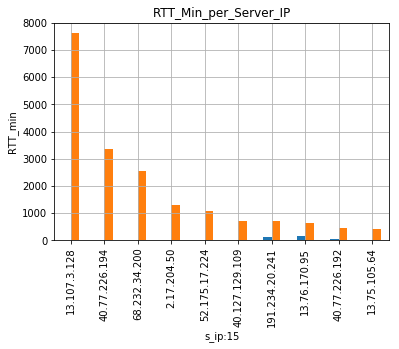

In [363]:
axes = RTT_Min_sorted.head(10).plot.bar(grid=True, legend=False)
axes.set_ylabel("RTT_min");
axes.set_title("RTT_Min_per_Server_IP")


In [375]:
Server_Italy = RTT_Min_sorted[RTT_Min_sorted['c_rtt_min:46'] < 10];
len(Server_Italy)

14

In [374]:
Server_Outside_Europe =  RTT_Min_sorted[RTT_Min_sorted['c_rtt_min:46']>100];
len(Server_Outside_Europe)

113

As we can see from the list, there are only 14 servers placed in Italy which have minimum RTT<10ms. Most of them have RTT_min>100 which means that servers are placed outside Europe, to be precised 113 servers are placed outside Europe.

In [346]:
RTT_Avr = Servers['c_rtt_avg:45'].avr()

clients = Servers["#15#c_ip:1"].count()
RTT_Avr = pd.concat([RTT_Avr, clients], axis=1)

RTT_Avr_sorted=RTT_Avr.sort_values(by=['#15#c_ip:1'],ascending=False)
RTT_Avr_sorted.head(10)

,c_rtt_avg:45,#15#c_ip:1
s_ip:15,,
13.107.3.128,0.000000,7614
40.77.226.194,35.970797,3366
68.232.34.200,2.664789,2548
2.17.204.50,2.575686,1287
52.175.17.224,0.000000,1096
40.127.129.109,36.766871,710
191.234.20.241,201.792803,709
13.76.170.95,156.662267,628
40.77.226.192,37.944105,454


Text(0.5,1,'RTT_Avr_per_Server_IP')

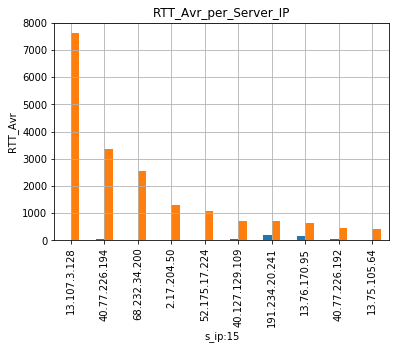

In [376]:
axes = RTT_Avr_sorted.head(10).plot.bar(grid=True, legend=False)
axes.set_ylabel("RTT_Avr");
axes.set_title("RTT_Avr_per_Server_IP")

### Number of flows and total bytes exchanged.

Here we will have to make a scatter plot by taking one point per each subservice characterized by number of connections and total amount of bytes handled.

We create a new dataframe by applying groupby at subservices column. In this way we will have a table where on each row will be one subservice and other statistics related to it.

Furthermore, we create another dataframe containing only total amount of bytes handled by each subservice (taking into account bytes sent from service to client and viceversa). We count again number of flows per each subservice and store in a dataframe named "clients".

At the end we need to merge all DF to one big Table and use the columns: Total_Bytes and #15#c_ip:1 to make the plot.

In [380]:
subservices = file_log.groupby("skype_subservices")
amount_of_bytes = subservices[['c_bytes_all:9','s_bytes_all:23']].sum()
amount_of_bytes['Total_Bytes'] = amount_of_bytes['c_bytes_all:9']+byt['s_bytes_all:23']
clients = subservices["#15#c_ip:1"].count()

Table=pd.concat([amount_of_bytes, clients], axis=1)
Table_sorted=Table.sort_values(by=['#15#c_ip:1'],ascending=False)

Table_sorted.head(10)


,c_bytes_all:9,s_bytes_all:23,Total_Bytes,#15#c_ip:1
skype_subservices,,,,
config.edge.skype.com,5033906,44622470,49656376,6024
client-s.gateway.messenger.live.com,41869575,32697168,74566743,2917
static-asm.secure.skypeassets.com,3888497,101171798,105060295,2005
static.asm.skype.com,3482537,12771566,16254103,1949
apps.skype.com,2307077,11852571,14159648,1259
edge.skype.com,1794379,6711008,8505387,984
a.config.skype.com,1005323,14508657,15513980,921
b.config.skype.com,837989,13029795,13867784,753
pipe.skype.com,5454239,4047344,9501583,606


Text(0,0.5,'Number_of_clients_per_Service')

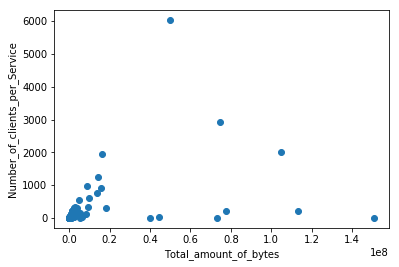

In [381]:
pl = plt.scatter(x="Total_Bytes",y="#15#c_ip:1",data=Table_sorted)
plt.xlabel('Total_amount_of_bytes')
plt.ylabel('Number_of_clients_per_Service')

From the scatter plota above we can notice a lot of services that serve few clients and exchange few data, moslty on top left part of plot. It might correspont to subservices dealing with authentication or synchronization. Whereas points at the right side correspond to the domain :  __download.skype.com__ and it may deal with data exchange, as it serves few users but it handles a lot more bytes with respect to other domains. 

In [382]:
Table_sorted.sort_values(by=['Total_Bytes'],ascending=False).head(5)

,c_bytes_all:9,s_bytes_all:23,Total_Bytes,#15#c_ip:1
skype_subservices,,,,
download.skype.com,82241,150797842,150880083,12
api.asm.skype.com,111318785,2095789,113414574,216
static-asm.secure.skypeassets.com,3888497,101171798,105060295,2005
swx.cdn.skype.com,346914,77117550,77464464,225
client-s.gateway.messenger.live.com,41869575,32697168,74566743,2917
